# TRABAJO PRÁCTICO 3

### Algoritmos Evolutivos

Alumno: Leandro Bello


URL: https://github.com/manco92/Algoritmos_gen

In [84]:
# Importo librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

### EJERCICIO 1

Una fábrica produce cuatro tipos de partes automotrices. Cada una de ellas primero se fabrica y luego se le dan los acabados. Las horas de trabajador requeridas y la utilidad para cada parte son las siguientes:

|  | A | B | C | D |
|-----------|-----------|-----------|-----------|-----------|
| Tiempo de fabricación (hs/100 un)   | 2.5   | 1.5   | 2.75   |2   |
| Tiempo de acabados (hs/100 un)      | 3.5   | 3     | 3      |2   |
| Utilidad (hs/100 un)                | 375   | 275   | 475    |325 |

Las capacidades de los talleres de fabricación y acabados para el mes siguiente son de 640 y 960 horas, respectivamente. Determinar mediante un algoritmo PSO con restricciones (sin usar bibliotecas para PSO) que cantidad de cada parte debe producirse a fin de maximizar la utilidad y resolver las siguientes consignas:
* Transcribir el algoritmo escrito en Python a un archivo .pdf de acuerdo a los siguientes parámetros: número de partículas $= 20$, máximo número de iteraciones 50, coeficientes de aceleración $c1 = c2 = 1.4944$, factor de inercia $w = 0.6$.
* Transcribir al .pdf la solución óptima encontrada (dominio) y el valor objetivo óptimo (imagen).
* Indicar en el .pdf la URL del repositorio en donde se encuentra el algoritmo PSO.+
* Realizar un gráfico de línea que muestre gbest (eje de ordenadas) en función de las iteraciones realizadas (eje de abscisas). El gráfico debe contener etiquetas en los ejes, leyenda y un título. El gráfico debe ser pegado en el .pdf.
* Explicar (en el .pdf) y demostrar (desde el código fuente) que sucede si se reduce en 1 unidad el tiempo de acabado de la parte B.
* Realizar observaciones/comentarios/conclusiones en el .pdf acerca de qué cantidad mínima de partículas es recomendable utilizar para este problema específicamente.

In [85]:
# función objetivo a maximizar
def f(x):
    return 375 * x[0] + 275 * x[1] + 475 * x[2] + 325 * x[3]


# primera restriccion
def g1(x):
    return 2.5 * x[0] + 1.5 * x[1] + 2.75 * x[2] + 2 * x[3] - 640 <= 0


# segunda restriccion
def g2(x):
    return 3.5 * x[0] + 3 * x[1] + 3 * x[2] + 2 * x[3] - 960 <= 0

# tercera restriccion
def g3(x):
    return x[0] >= 0 and x[1] >= 0 and x[2] >= 0 and x[3] >= 0

In [86]:
def solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w, verbose=True):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = -np.inf * np.ones(n_particles)  # mector para las mejores aptitudes personales (inicialmente -infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
    g_bests = []

    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]) and g3(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal

    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global

            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula

            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()

        g_bests.append(gbest)

    # Se imprime la mejor solucion encontrada y también su valor optimo
    mejor_solucion = gbest
    valor_optimo = gbest_fit
    if verbose:
        print(f"Mejor solucion: [{gbest[0]:.0f}, {gbest[1]:.0f}, {gbest[2]:.0f}, {gbest[3]:.0f}]")
        print(f"Valor optimo: {gbest_fit}")

    return mejor_solucion, valor_optimo, g_bests

In [87]:
# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 4  # dimensiones del espacio de busqueda (x1, x2, x3 y x4)
max_iterations = 50  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.4944  # coeficientes de aceleracion
w = 0.6  # Factor de inercia

solucion_optima, valor_optimo, g_bests = solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w)

Mejor solucion: [103, 47, 59, 74]
Valor optimo: 103891.50649882703


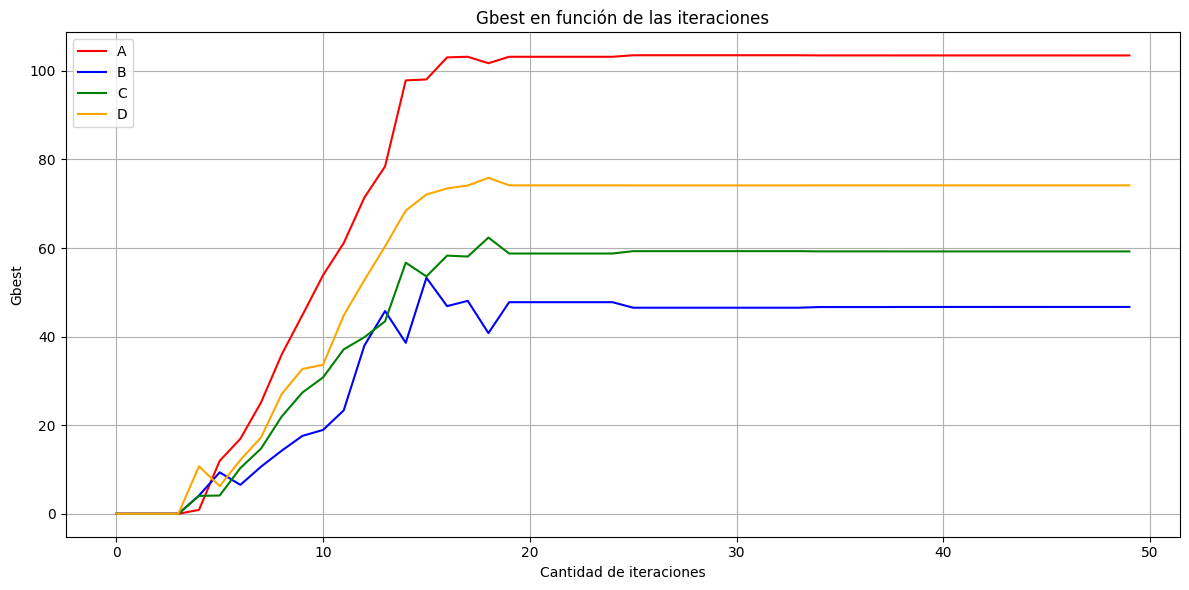

In [88]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(g_bests))
y = g_bests

ax.plot(x, np.array(g_bests)[:, 0], color='red', label='A')
ax.plot(x, np.array(g_bests)[:, 1], color='blue', label='B')
ax.plot(x, np.array(g_bests)[:, 2], color='green', label='C')
ax.plot(x, np.array(g_bests)[:, 3], color='orange', label='D')
ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Qué ocurre si se reduce en 1 unidad el tiempo de acabado de B

In [89]:
# se modifica la segunda restricción
def g2(x):
    return 3.5 * x[0] + 2 * x[1] + 3 * x[2] + 2 * x[3] - 960 <= 0

In [90]:
solucion_optima, valor_optimo, g_bests = solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w)

Mejor solucion: [41, 46, 104, 92]
Valor optimo: 107068.40810140736


Al reducir en una unidad el tiempo de acabado de B, la producción A y B baja, mientras que la de C y D crece.

PRODUCCIÓN PREVIA: [103, 47, 59, 74]

PRODUCCIÓN ACTUAL: [41, 46, 104, 92]

El gráfico de gbest en función de la cantidad de iteraciones indica que no son necesarias más de 12 interacines, porque ya se halló la solución.

### Cálculo de número de partículas mínimo

In [106]:
valores_optimos = []
for n_particles in tqdm(range(1, 80)):
    solucion_optima, valor_optimo, g_bests = solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w, verbose=False)
    valores_optimos.append(valor_optimo)

  0%|          | 0/79 [00:00<?, ?it/s]

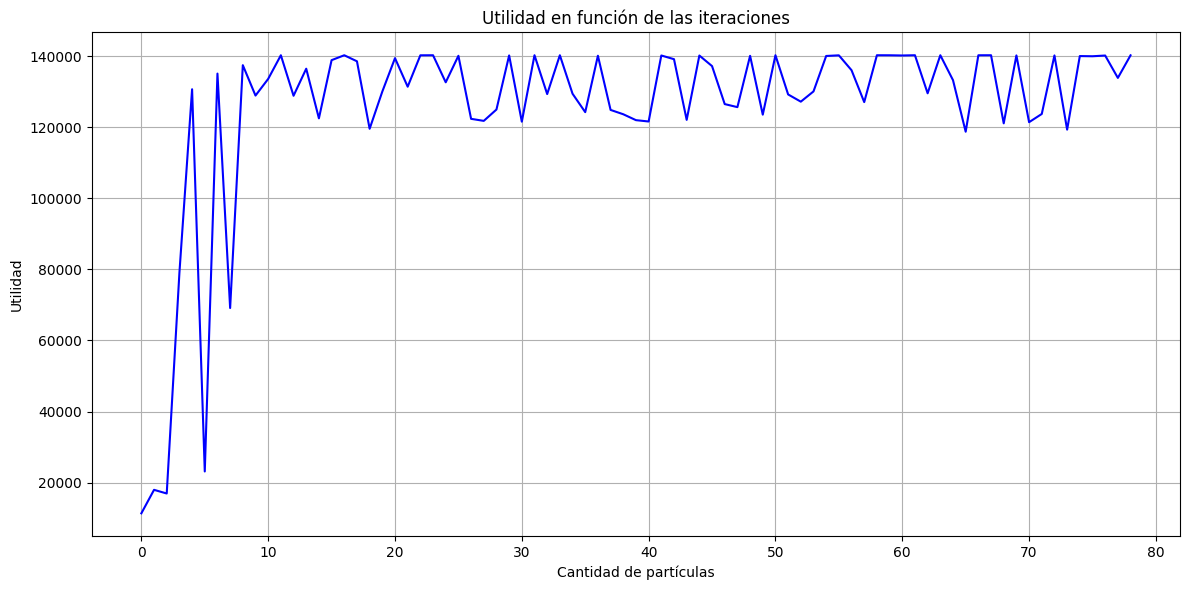

In [107]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(79)
y = valores_optimos

ax.plot(x, y, color='blue')
ax.set_title('Utilidad en función de las iteraciones')
ax.set_xlabel('Cantidad de partículas')
ax.set_ylabel('Utilidad')

plt.grid()
plt.tight_layout()
plt.show()

Como se puede ver en el gráfico anterior, el algoritmo de optimización es estocástico. Pero se ve claramente que a partir de 8 partículas es suficiente.

### Calcular distribuciones de valores de producción

In [93]:
# parametros
n_particles = 50  # numero de particulas en el enjambre
n_dimensions = 4  # dimensiones del espacio de busqueda (x1, x2, x3 y x4)
max_iterations = 50  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.4944  # coeficientes de aceleracion
w = 0.6  # Factor de inercia

soluciones_optimas = []
for _ in tqdm(range(1000)):
    solucion_optima, valor_optimo, g_bests = solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w, verbose=False)
    soluciones_optimas.append(solucion_optima)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [94]:
import pandas as pd
soluciones_optimas = pd.DataFrame(np.array(soluciones_optimas), columns=['A', 'B', 'C', 'D'])

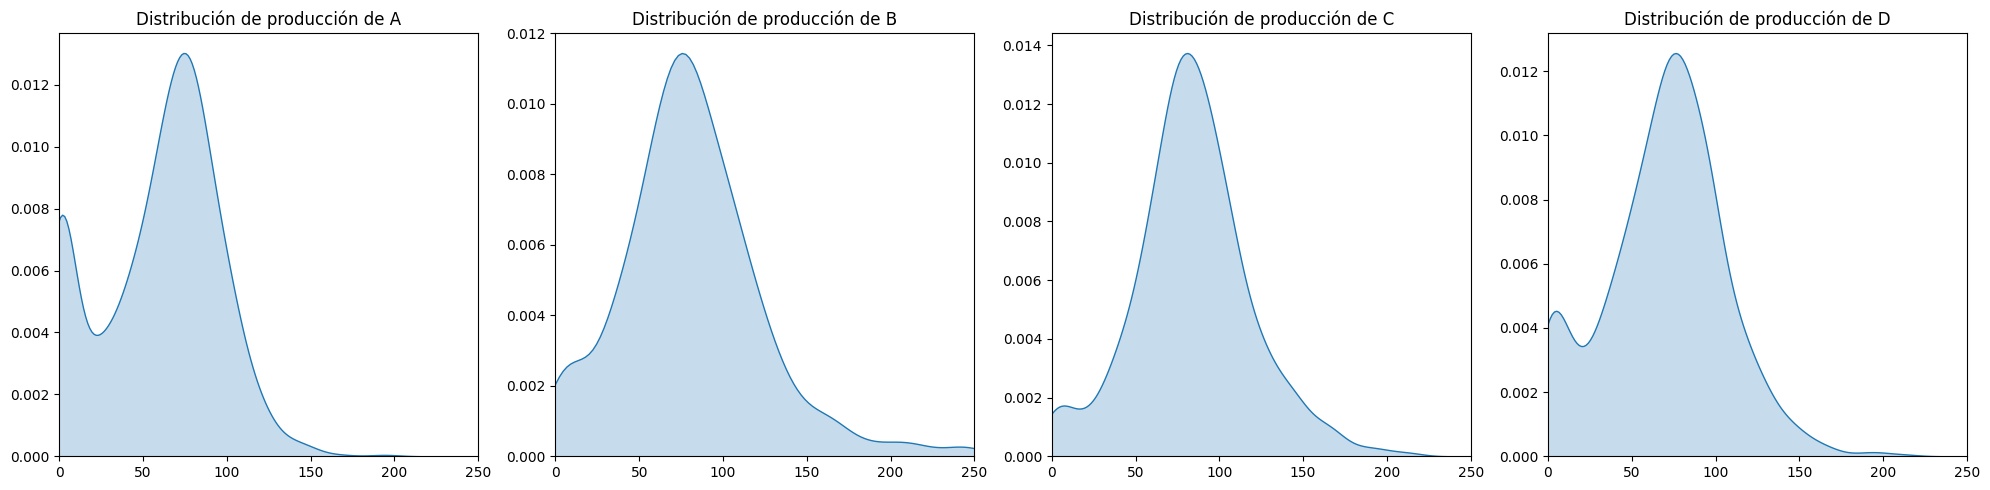

In [95]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i,n in enumerate(['A', 'B', 'C', 'D']):
    sns.kdeplot(x=soluciones_optimas[n], data=soluciones_optimas, ax=ax[i], fill=True)
    ax[i].set_title(f'Distribución de producción de {n}')
    ax[i].set_xlim((0, 250))
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

En el gráfico anterior, se puede ver cómo los valores de producción de A, B, C y D pueden cambiar, lográndose un mismo valor de utilidad.

### EJERCICIO 2

Un fabricante de equipos de cómputo produce dos tipos de impresoras (impresoras de tipo 1 e impresoras de tipo 2). Los recursos necesarios para producirlas así como las utilidades correspondientes son los que siguen:

| Equipo | Capital ($/un) | Mano de obra (hs/u) | Utilidad ($/un) |
|-----------|-----------|-----------|-----------|
| Impresora 1   | 300   | 20   | 500   |
| Impresora 2   | 400   | 10   | 400   |

Si cada día se dispone de \$127000 de capital y 4270 horas de mano de obra, ¿qué cantidad de cada equipo debe producirse a diario a fin de maximizar la utilidad? Escriba el algoritmo PSO con restricciones (sin usar bibliotecas para PSO) que permita optimizar la utilidad y resolver cumpliendo con las siguientes consignas:
* Transcribir el algoritmo escrito en Python a un archivo .pdf de acuerdo a los siguientes parámetros: número de partículas $= 10$, máximo número de
iteraciones 80, coeficientes de aceleración $c1 = c2 = 2$, factor de inercia $w = 0.5$.
* Transcribir al .pdf la solución óptima encontrada (dominio) y el valor objetivo óptimo (imagen).
* Indicar en el .pdf la URL del repositorio en donde se encuentra el algoritmo PSO.
* Realizar un gráfico de línea que muestre gbest (eje de ordenadas) en función de las iteraciones realizadas (eje de abscisas). El gráfico debe contener etiquetas en los ejes, leyenda y un título. El gráfico debe ser pegado en el .pdf.
* Explicar (en el .pdf) y demostrar (desde el código fuente) que sucede si se incrementa en 1 unidad la cantidad horas requeridas para fabricar la Impresora 2.
* Realizar observaciones/comentarios/conclusiones en el .pdf acerca de qué cantidad mínima de partículas es recomendable utilizar para este problema específicamente.

In [96]:
# función objetivo a maximizar
def f(x):
    return 500 * x[0] + 400 * x[1]

# primera restriccion
def g1(x):
    return 300 * x[0] + 400 * x[1] - 127000 <= 0

# segunda restriccion
def g2(x):
    return 20 * x[0] + 10 * x[1] - 4270 <= 0

# tercera restriccion
def g3(x):
    return x[0] >= 0 and x[1] >= 0

In [97]:
def solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w, verbose=True):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = -np.inf * np.ones(n_particles)  # mector para las mejores aptitudes personales (inicialmente -infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
    g_bests = []

    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]) and g3(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal

    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global

            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula

            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()

        g_bests.append(gbest)

    # Se imprime la mejor solucion encontrada y también su valor optimo
    mejor_solucion = gbest
    valor_optimo = gbest_fit
    if verbose:
        print(f"Mejor solucion: [{gbest[0]:.0f}, {gbest[1]:.0f}]")
        print(f"Valor optimo: {gbest_fit}")

    return mejor_solucion, valor_optimo, g_bests

In [98]:
# parametros
n_particles = 10  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 80  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 2  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

solucion_optima, valor_optimo, g_bests = solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w)

Mejor solucion: [139, 148]
Valor optimo: 129014.55117169215


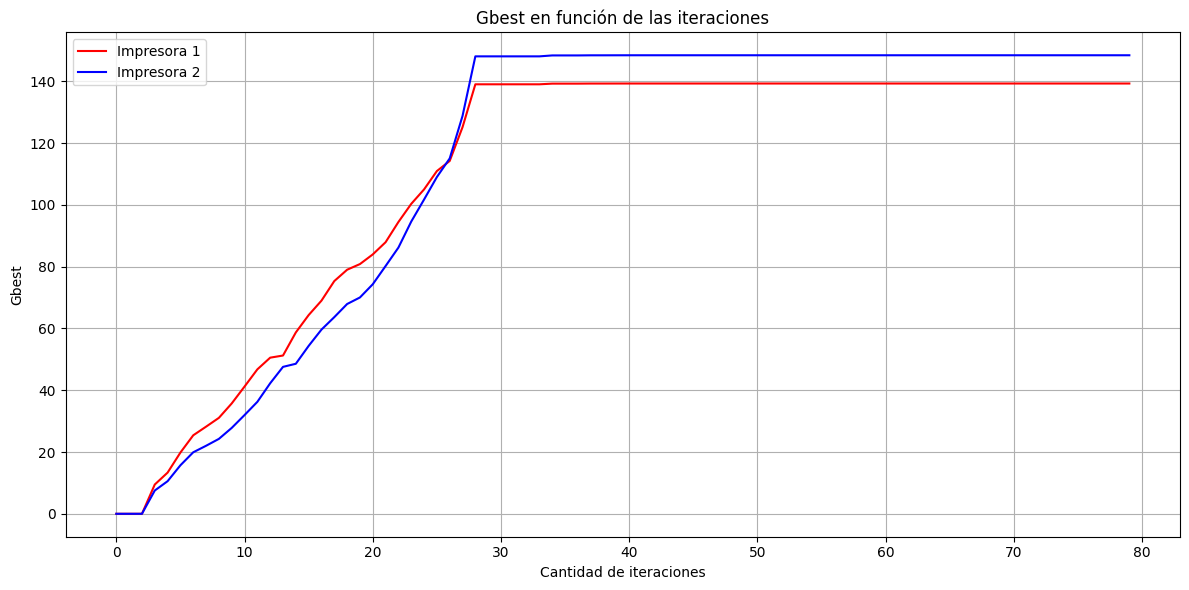

In [99]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(g_bests))
y = g_bests

ax.plot(x, np.array(g_bests)[:, 0], color='red', label='Impresora 1')
ax.plot(x, np.array(g_bests)[:, 1], color='blue', label='Impresora 2')
ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Qué ocurre si se aumenta en 1 unidad el tiempo de mano de obra de la impresora 2

In [100]:
# segunda restriccion
def g2(x):
    return 20 * x[0] + 11 * x[1] - 4270 <= 0

In [101]:
# parametros
n_particles = 10  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 80  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 2  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

solucion_optima, valor_optimo, g_bests = solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w)

Mejor solucion: [158, 101]
Valor optimo: 119339.27215462667


Al aumentar en una unidad el tiempo de mano de obra de la impresora 2, la producción la impresora 1 sube, mientras que la impresaora 2 baja.

PRODUCCIÓN PREVIA: [139, 148]

PRODUCCIÓN ACTUAL: [158, 101]

### Calcular distribuciones de valores de producción

In [102]:
# parametros
n_particles = 50  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 80  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 2  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

soluciones_optimas = []
for _ in tqdm(range(1000)):
    solucion_optima, valor_optimo, g_bests = solve_pso(f, g1, g2, g3, n_particles, n_dimensions, max_iterations, c1, c2, w, verbose=False)
    soluciones_optimas.append(solucion_optima)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [103]:
import pandas as pd
soluciones_optimas = pd.DataFrame(np.array(soluciones_optimas), columns=['Impresora 1', 'Impresora 2'])

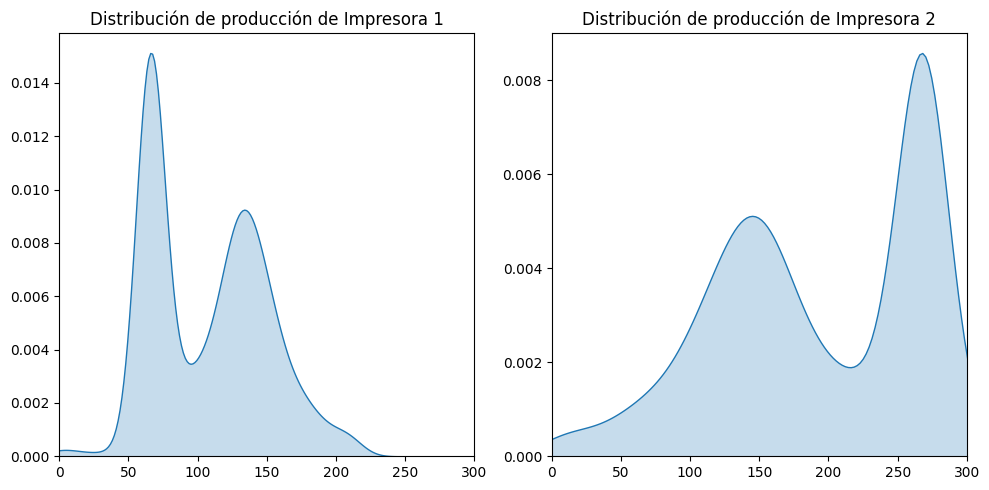

In [104]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
for i,n in enumerate(['Impresora 1', 'Impresora 2']):
    sns.kdeplot(x=soluciones_optimas[n], data=soluciones_optimas, ax=ax[i], fill=True)
    ax[i].set_title(f'Distribución de producción de {n}')
    ax[i].set_xlim((0, 300))
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

En el gráfico anterior, se puede ver cómo los valores de producción de las impresoras pueden cambiar para un mismo valor de utilidad.

In [108]:
# CÓDIGO PARA EXPORTAR NOTEBOOK
from nbconvert import PDFExporter
import nbformat

# NOMBRE DEL NOTEBOOK
notebook_filename = "C:/Users/Leandro/Desktop/IoT/5_Bimestre/Algoritmos genéticos/TP3/TP3.ipynb"

# LEO EL NOTEBOOK
with open(notebook_filename, 'r', encoding='utf-8') as nb_file:
    notebook = nbformat.read(nb_file, as_version=4)

# CONFIGURO EL EXPORTADOR PDF
pdf_exporter = PDFExporter()

# CONVIERTO A PDF
pdf_data, _ = pdf_exporter.from_notebook_node(notebook)

# GUARDO EL PDF
pdf_filename = "C:/Users/Leandro/Desktop/IoT/5_Bimestre/Algoritmos genéticos/TP3/TP3.pdf"
with open(pdf_filename, 'wb') as pdf_file:
    pdf_file.write(pdf_data)